In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (silhouette_score)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df= pd.read_csv("Crop_recommendation.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [14]:
print(df['label'].value_counts())

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


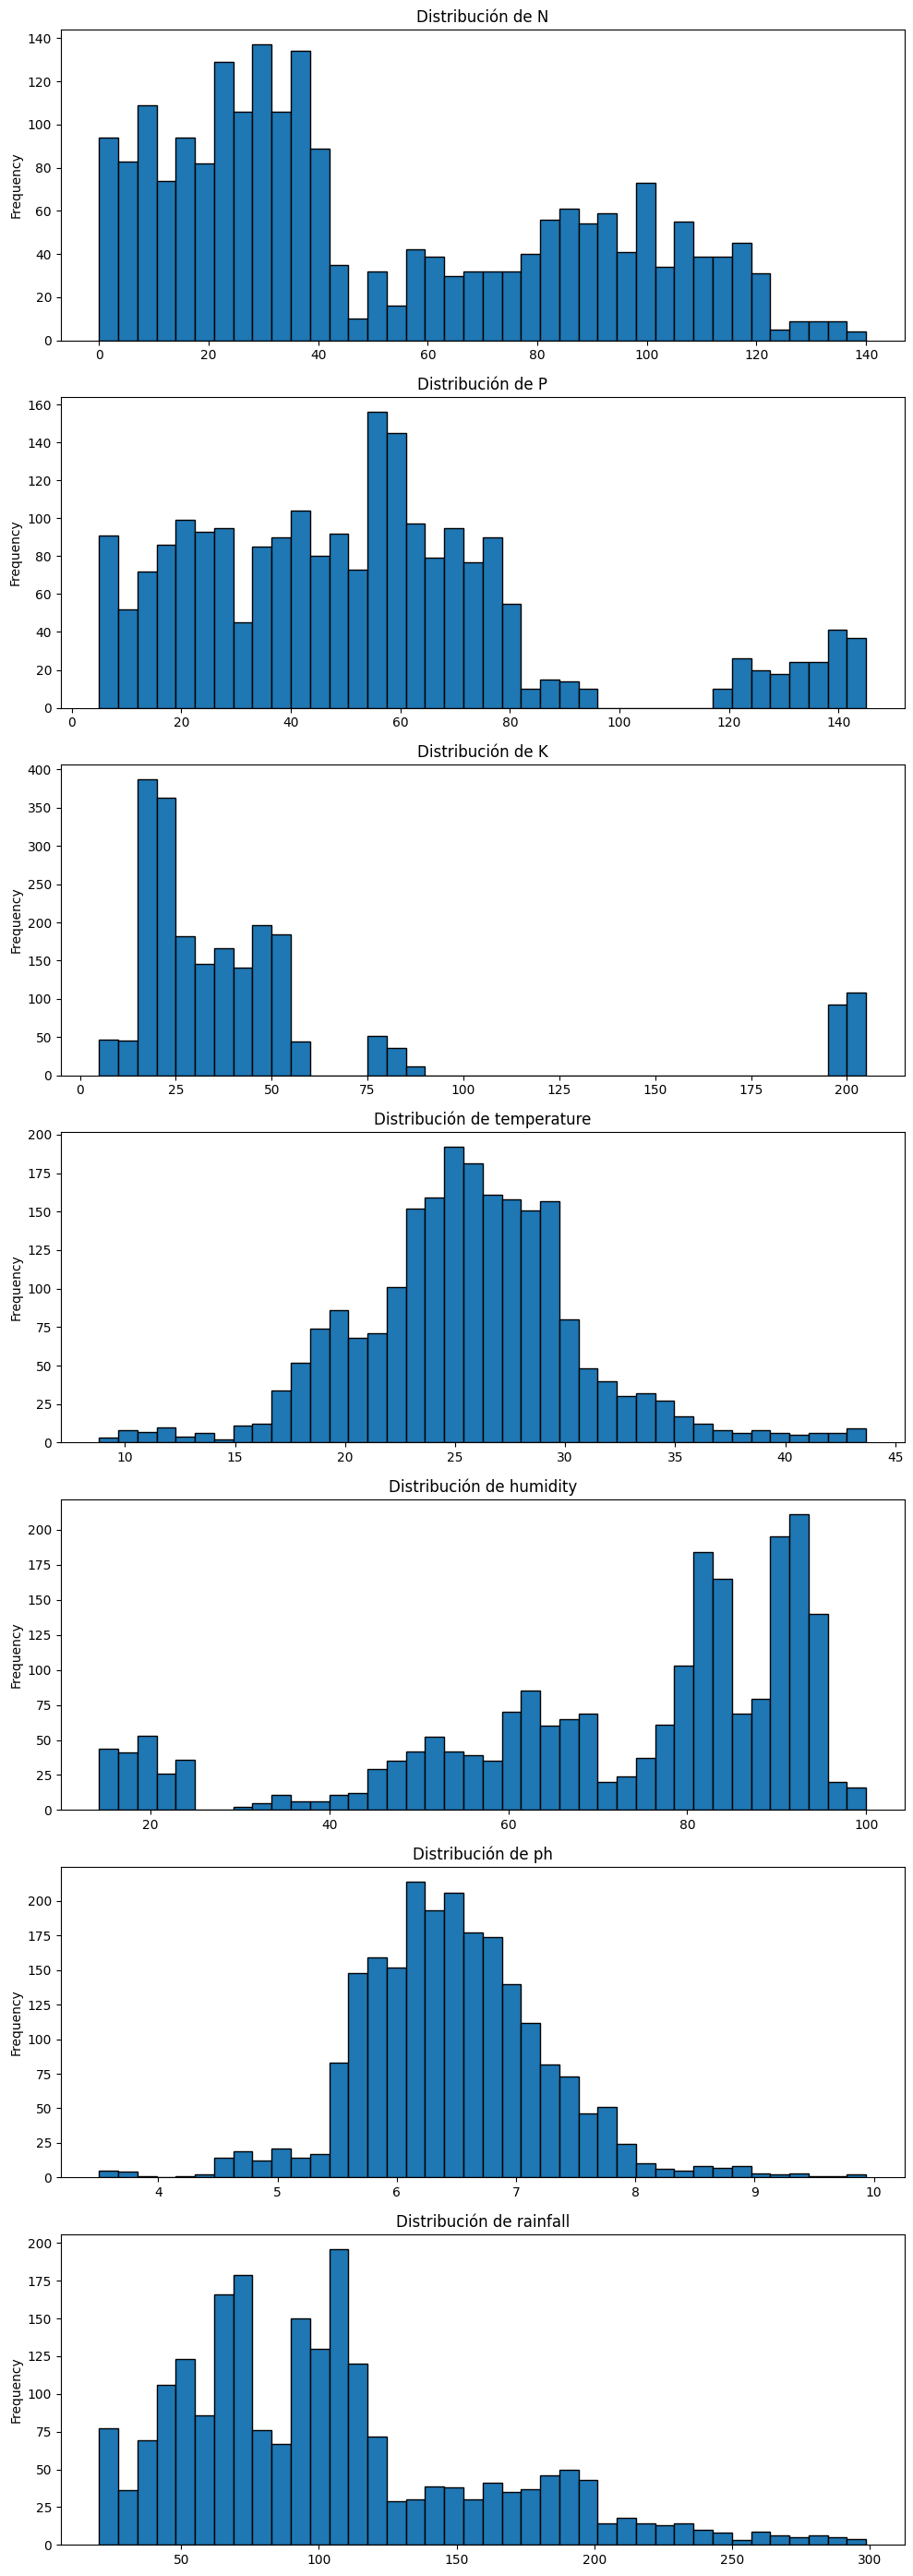

In [15]:
df_sin_label = df.drop(columns="label")

num_cols = len(df_sin_label.columns)

fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 4*num_cols))

for ax, column in zip(axes, df_sin_label.columns):
    df_sin_label[column].plot(
        kind='hist', bins=40, edgecolor='k', ax=ax
    )
    ax.set_title(f"Distribución de {column}")

plt.tight_layout()
plt.show()


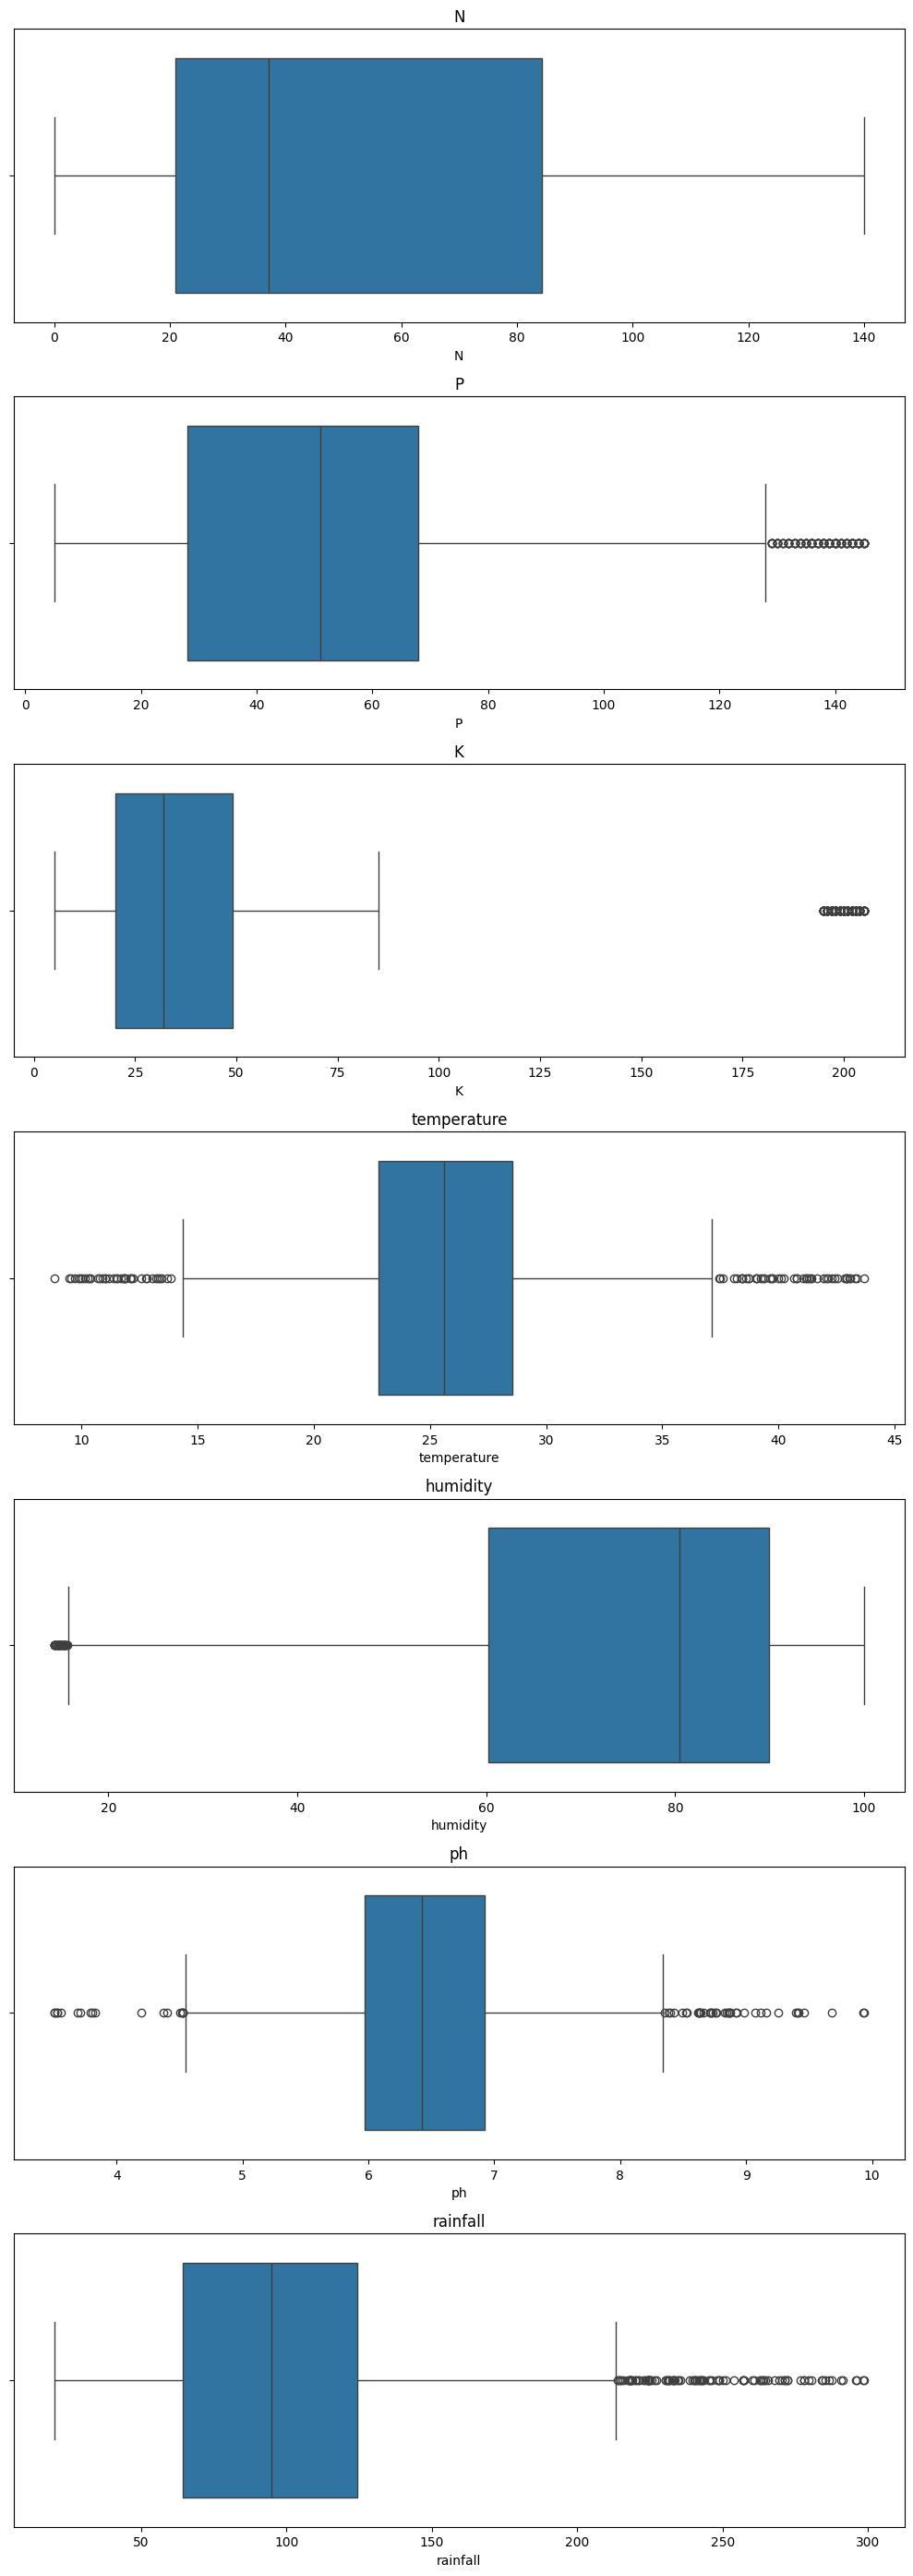

In [16]:
cols = df_sin_label.columns

fig, axes = plt.subplots(num_cols, 1, figsize=(10, 4*num_cols))

for ax, col in zip(axes, cols):
    sns.boxplot(data=df_sin_label, x=col, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()


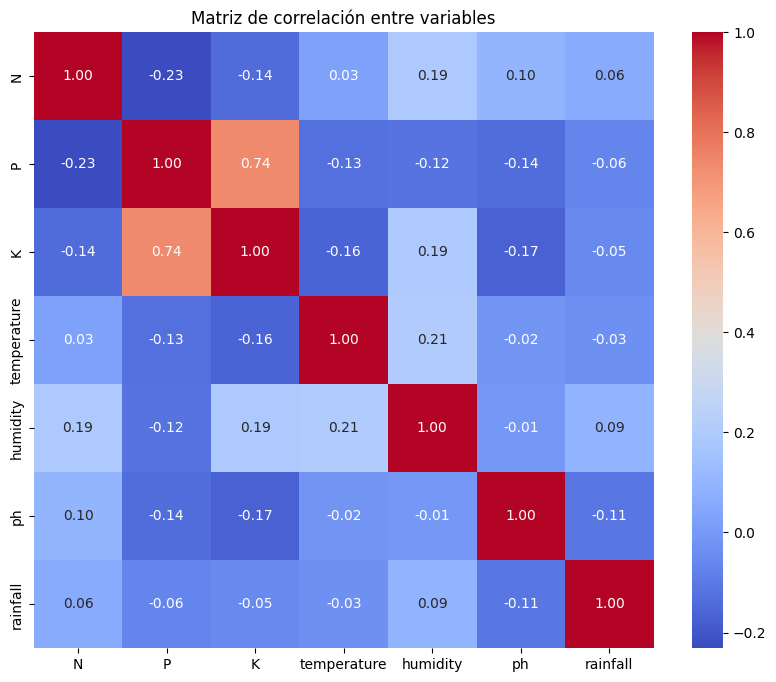

In [17]:
cor = df_sin_label.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()

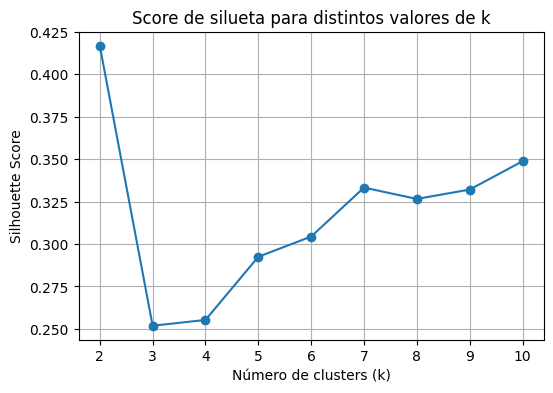

In [18]:
X_std = StandardScaler().fit_transform(df_sin_label)

silhouette_scores = []
range_k = range(2, 11)

for k in range_k:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_std)
    silhouette_scores.append(silhouette_score(X_std, labels))
    
plt.figure(figsize=(6, 4))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title("Score de silueta para distintos valores de k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [19]:

km = KMeans(n_clusters=2, n_init=10, random_state=42)
labels = km.fit_predict(X_std)
df['cluster_kmeans'] = labels
display(df)



,N,P,K,temperature,humidity,ph,rainfall,label,cluster_kmeans
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,0


cluster_kmeans
0    2000
1     200
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

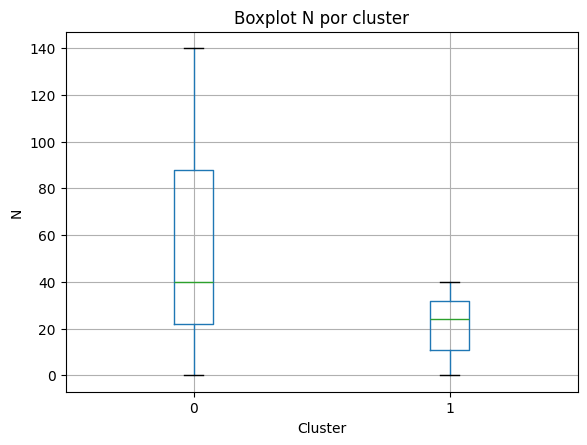

<Figure size 600x400 with 0 Axes>

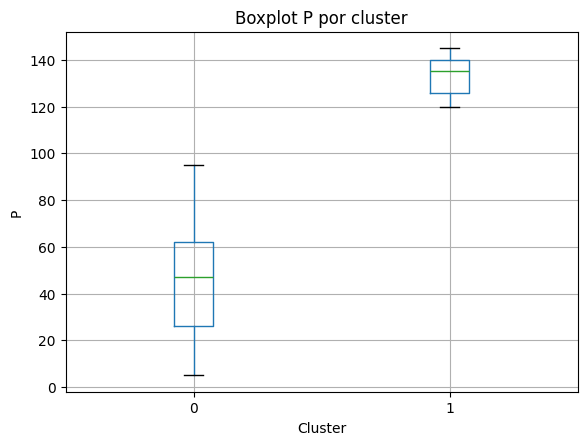

<Figure size 600x400 with 0 Axes>

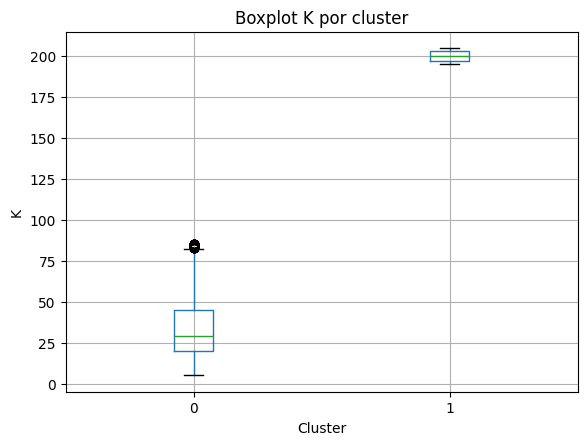

<Figure size 600x400 with 0 Axes>

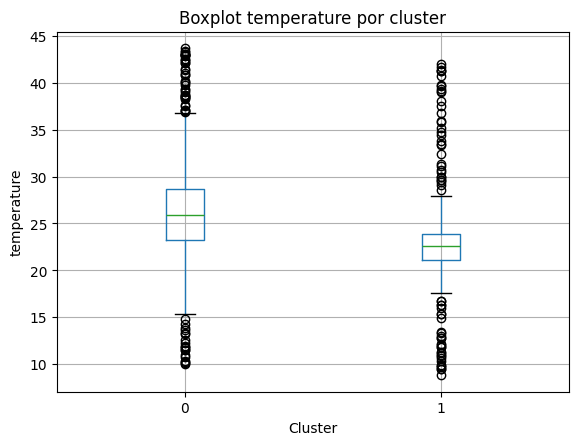

<Figure size 600x400 with 0 Axes>

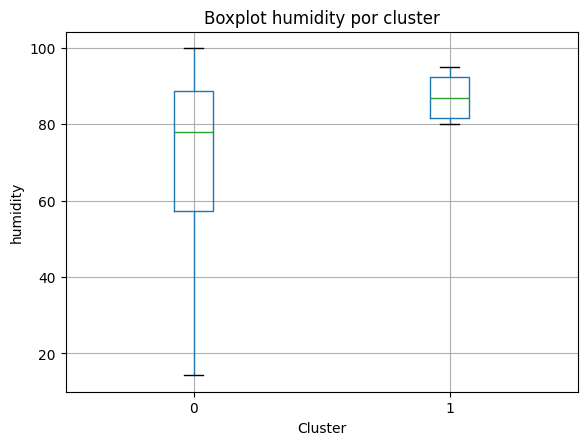

<Figure size 600x400 with 0 Axes>

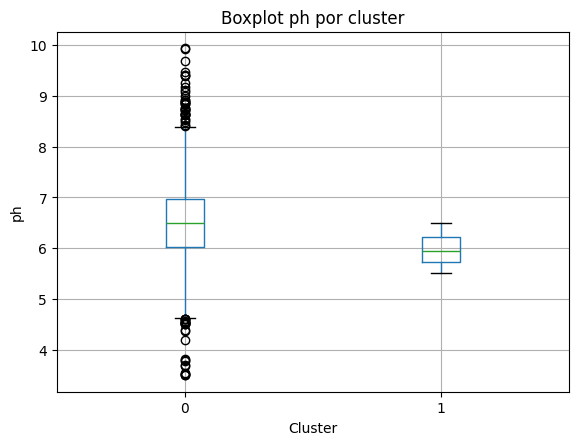

<Figure size 600x400 with 0 Axes>

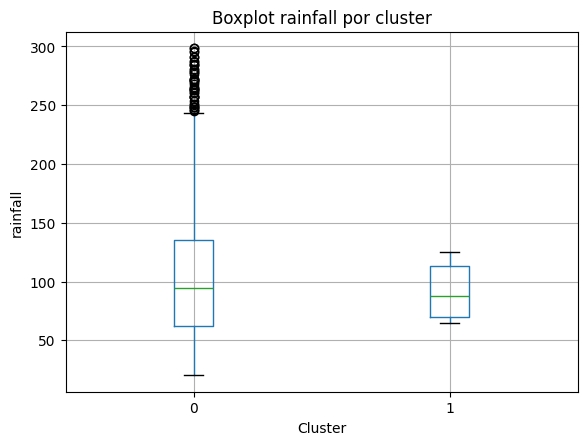

In [20]:

cluster_c = df['cluster_kmeans'].value_counts().sort_index()
print(cluster_c)

for col in df_sin_label.columns:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col, by='cluster_kmeans')
    plt.title(f'Boxplot {col} por cluster')
    plt.suptitle('')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()


## Las características más destacables de cada cluster son:

### Cluster 0:
Suelos con menor concentración de P (fósforo) y K (potasio), cantidad de N (nitrógeno) y temperaturas altas.
Importante: lo constituyen 2000 de 2200 registros.


### Cluster 1:
Suelos con valores altos de P (fósforo) y K (potasio), N (nitrógeno) bajo y alta humedad.
Lo constituyen 200 de 2200 registros.

### Los que más difieren entre ellos son K y P (coherente por matriz de correlación), por lo que decidí hacer la visualización de esas dos:

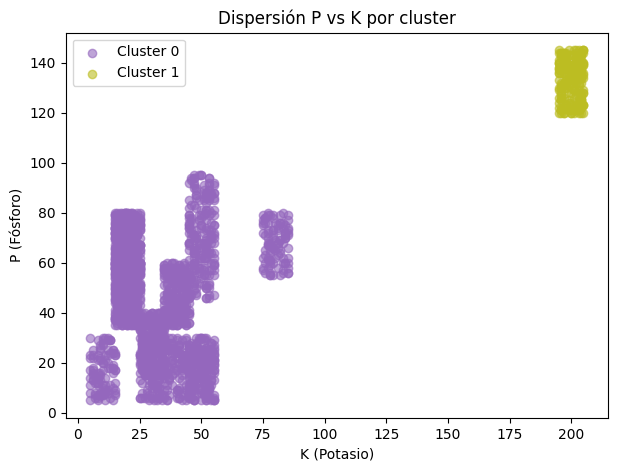

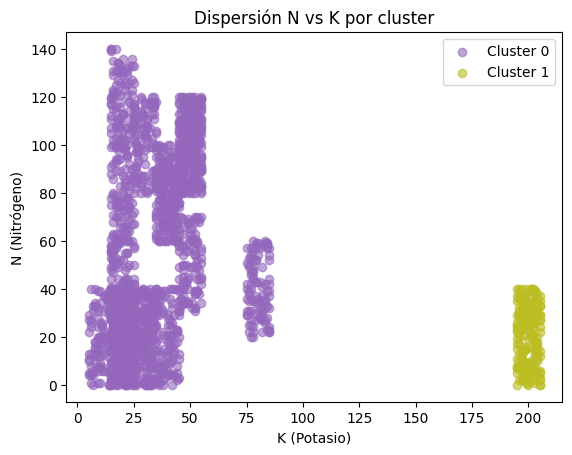

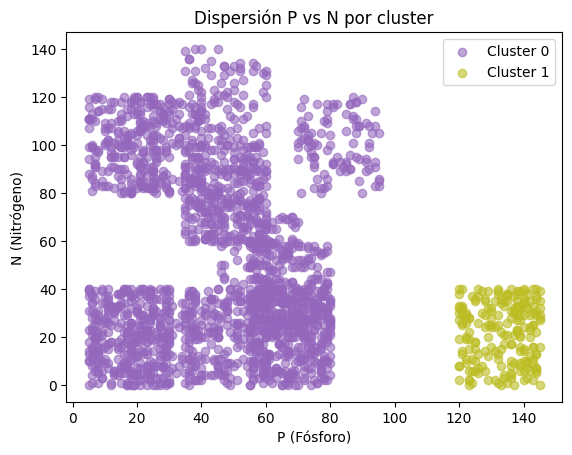

In [25]:
color = ['tab:purple', 'tab:olive']

plt.figure(figsize=(7,5))
for i, cluster in enumerate(df['cluster_kmeans'].unique()):
    plt.scatter(
        df[df['cluster_kmeans'] == cluster]['K'],
        df[df['cluster_kmeans'] == cluster]['P'],
        alpha=0.6,
        c=color[i],
        label=f'Cluster {cluster}'
    )

plt.xlabel('K (Potasio)')
plt.ylabel('P (Fósforo)')
plt.title('Dispersión P vs K por cluster')
plt.legend()
plt.show()

for i, cluster in enumerate(df['cluster_kmeans'].unique()):
    plt.scatter(
        df[df['cluster_kmeans'] == cluster]['K'],
        df[df['cluster_kmeans'] == cluster]['N'],
        alpha=0.6,
        c=color[i],
        label=f'Cluster {cluster}'
    )

plt.xlabel('K (Potasio)')
plt.ylabel('N (Nitrógeno)')
plt.title('Dispersión N vs K por cluster')
plt.legend()
plt.show()

for i, cluster in enumerate(df['cluster_kmeans'].unique()):
    plt.scatter(
        df[df['cluster_kmeans'] == cluster]['P'],
        df[df['cluster_kmeans'] == cluster]['N'],
        alpha=0.6,
        c=color[i],
        label=f'Cluster {cluster}'
    )

plt.xlabel('P (Fósforo)')
plt.ylabel('N (Nitrógeno)')
plt.title('Dispersión P vs N por cluster')
plt.legend()
plt.show()


In [22]:
pd.crosstab(df["cluster_kmeans"], df["label"]).T

cluster_kmeans,0,1
label,,
apple,0,100
banana,100,0
blackgram,100,0
chickpea,100,0
coconut,100,0
coffee,100,0
cotton,100,0
grapes,0,100
jute,100,0


#### Como se puede ver en esta tabla, el cluster 0 tiene todos los cultivos excepto manzanas y uvas, por lo que se puede asumir que estas requieren condiciones ambientales distintas al resto y parecidas entre si, por lo que el modelo las distingue y coloca en otro cluster.